In [1]:
import pandas as pd
import seaborn as sns
# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
# handle unbalanced data
from sklearn.metrics import roc_auc_score

In [3]:
!pwd
data = pd.read_csv("/Users/yanivbronshtein/Downloads/heart_failure_clinical_records_dataset.csv")  # type and enter pwd and see if dataset is in same directory
data.head()

/Users/yanivbronshtein/Coding/Rutgers/MerckChallengeIMLRepo


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
data.shape # 299 rows, 13 cols

(299, 13)

In [6]:
data.std()

age                            11.894809
anaemia                         0.496107
creatinine_phosphokinase      970.287881
diabetes                        0.494067
ejection_fraction              11.834841
high_blood_pressure             0.478136
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
sex                             0.478136
smoking                         0.467670
time                           77.614208
DEATH_EVENT                     0.467670
dtype: float64

In [7]:
data.info() # info about each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.isnull().any() # check if any missing data
# Q: Which variable(s) is dtype referring to?

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [9]:
## Correlation matrix
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [10]:
var = 'DEATH_EVENT' # defining and checking descriptive stats of variable of interest
series = data[var]

In [11]:
print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 0.3210702341137124
Stdev: 0.4676704280567721
Min: 0
Max: 1
Median: 0.0
Mode: 0    0
dtype: int64
Skew: 0.7703488154389491
Kurtosis: -1.4160799150023284


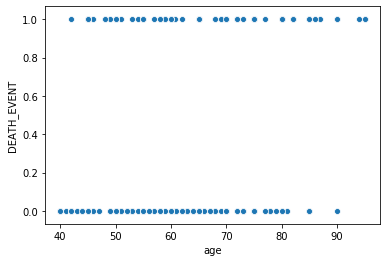

In [12]:
### Graphical Summaries
## Scatterplots
sns.scatterplot(x = "age", y = "DEATH_EVENT", data = data)

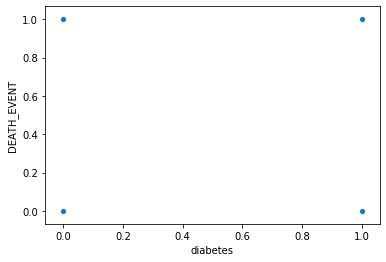

In [13]:
sns.scatterplot(x = "diabetes", y = "DEATH_EVENT", data = data)

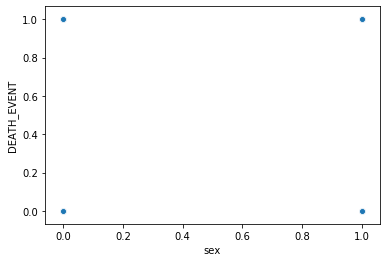

In [14]:
sns.scatterplot(x = "sex", y = "DEATH_EVENT", data = data)

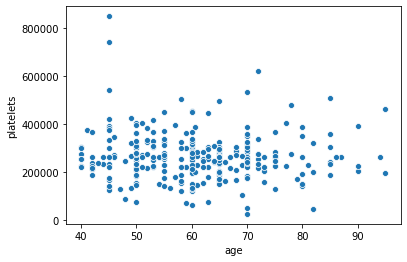

In [15]:
sns.scatterplot(x = "age", y = "platelets", data = data) # used for testing continous DV

In [16]:
#sns.pairplot(data = data)
# Q: How to zoom in on particular plots?

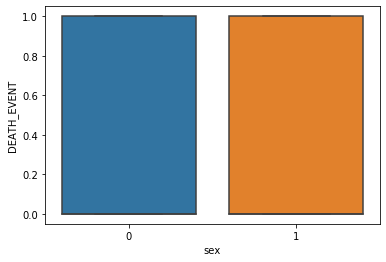

In [17]:
## Boxplots
sns.boxplot(x='sex', y='DEATH_EVENT', data= data)

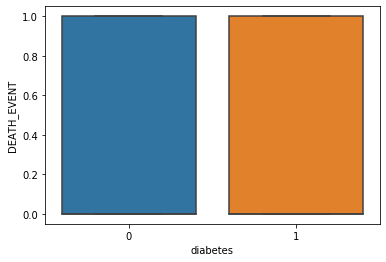

In [18]:
sns.boxplot(x='diabetes', y='DEATH_EVENT', data= data)

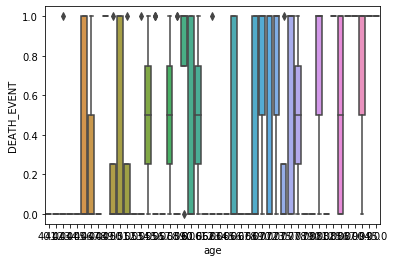

In [19]:
sns.boxplot(x='age', y='DEATH_EVENT', data= data)

In [20]:
# Get variable names

def getvar(x):
    for i in x:
        print(i)

In [21]:
getvar(data)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


40.0
95.0


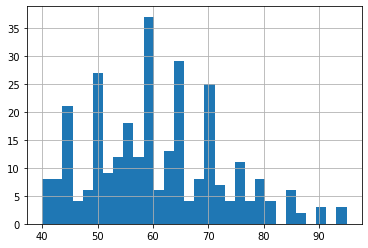

In [22]:
## Histograms
# Note: See cell 22 in Yaniv's EDA notebook

print(min(data['age']))
print(max(data['age'])) # used to check if increasing or decreasing bins is needed
data['age'].hist(bins=30)

0
1


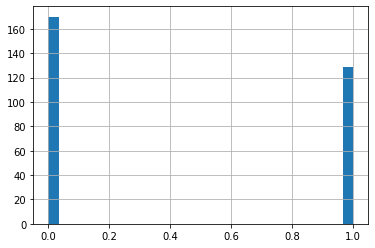

In [23]:
print(min(data['anaemia']))
print(max(data['anaemia'])) # used to check if increasing or decreasing bins is needed
data['anaemia'].hist(bins=30)

23
7861


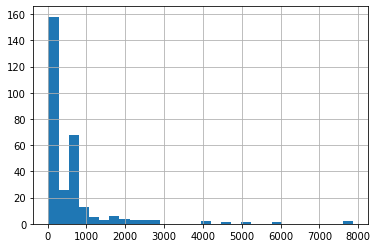

In [24]:
print(min(data['creatinine_phosphokinase']))
print(max(data['creatinine_phosphokinase'])) # used to check if increasing or decreasing bins is needed
data['creatinine_phosphokinase'].hist(bins=30)

0
1


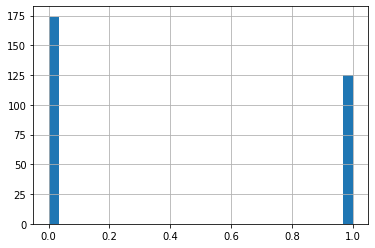

In [25]:
print(min(data['diabetes']))
print(max(data['diabetes'])) # used to check if increasing or decreasing bins is needed
data['diabetes'].hist(bins=30)

14
80


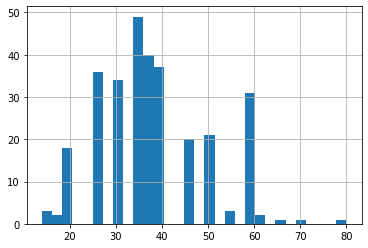

In [26]:
print(min(data['ejection_fraction']))
print(max(data['ejection_fraction'])) # used to check if increasing or decreasing bins is needed
data['ejection_fraction'].hist(bins=30)

0
1


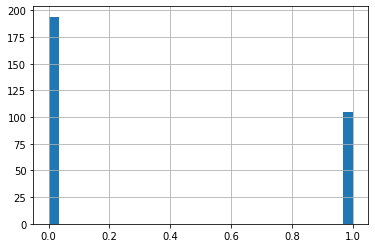

In [27]:
print(min(data['high_blood_pressure']))
print(max(data['high_blood_pressure'])) # used to check if increasing or decreasing bins is needed
data['high_blood_pressure'].hist(bins=30)

25100.0
850000.0


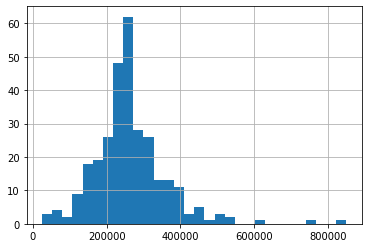

In [28]:
print(min(data['platelets']))
print(max(data['platelets'])) # used to check if increasing or decreasing bins is needed
data['platelets'].hist(bins=30)

0.5
9.4


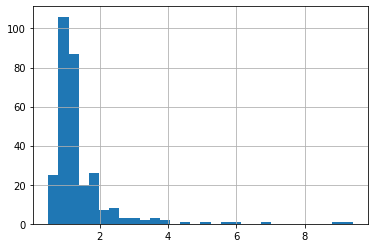

In [29]:
print(min(data['serum_creatinine']))
print(max(data['serum_creatinine'])) # used to check if increasing or decreasing bins is needed
data['serum_creatinine'].hist(bins=30)

113
148


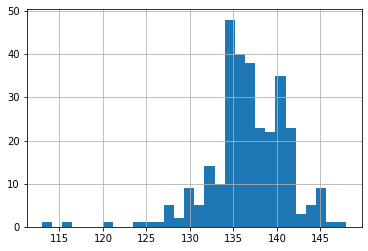

In [30]:
print(min(data['serum_sodium']))
print(max(data['serum_sodium'])) # used to check if increasing or decreasing bins is needed
data['serum_sodium'].hist(bins=30)

0
1


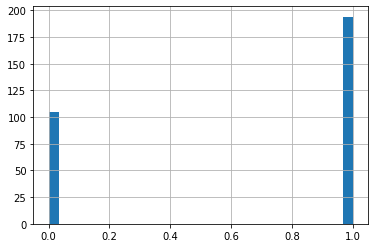

In [31]:
print(min(data['sex']))
print(max(data['sex'])) # used to check if increasing or decreasing bins is needed
data['sex'].hist(bins=30)

0
1


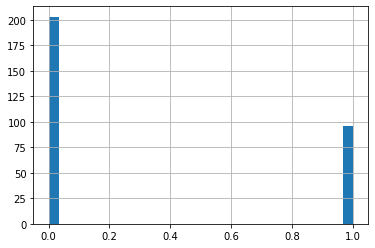

In [32]:
print(min(data['smoking']))
print(max(data['smoking'])) # used to check if increasing or decreasing bins is needed
data['smoking'].hist(bins=30)

4
285


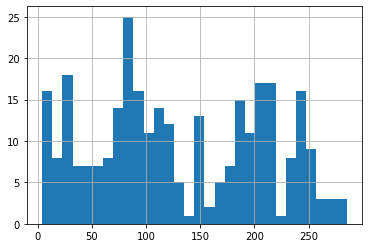

In [33]:
print(min(data['time']))
print(max(data['time'])) # used to check if increasing or decreasing bins is needed
data['time'].hist(bins=30)

0
1


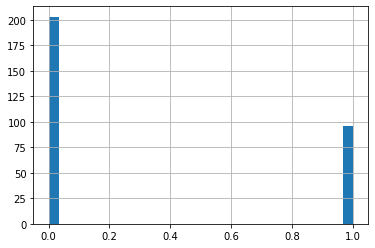

In [34]:
print(min(data['DEATH_EVENT']))
print(max(data['DEATH_EVENT'])) # used to check if increasing or decreasing bins is needed
data['DEATH_EVENT'].hist(bins=30)

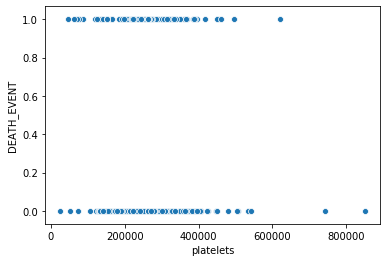

In [35]:
## Outliers
# Note: Can do it qualitatively or quantitatively... will be doing the former here. However, we can take the latter
# approach if we so desired: https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
# Q: Should use Judgement vs. IQR/Z-scores?

# Ex # 1: platelets variable
# Before
sns.scatterplot(x='platelets', y = 'DEATH_EVENT', data=data)

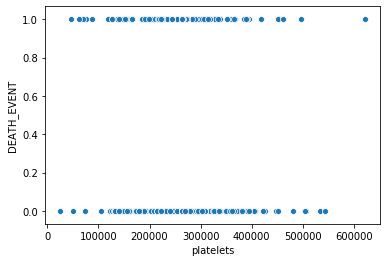

In [36]:
# After
# See cell 32 in Yaniv's EDA notebook

data = data[data['platelets'] <= 650000]
sns.scatterplot(x='platelets', y = 'DEATH_EVENT', data=data)

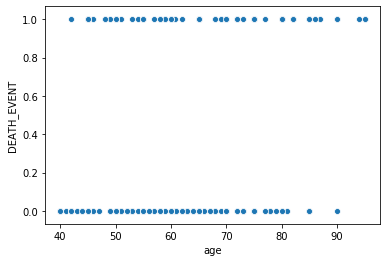

In [37]:
# Ex #2: age variable
# Note: don't think we should exclude age, as study wanted to focus on all age groups, but just to see

# Before
sns.scatterplot(x='age', y = 'DEATH_EVENT', data=data)

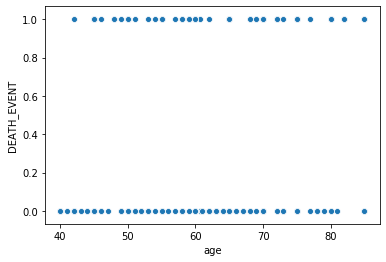

In [38]:
# After

data = data[data['age'] <= 85]
sns.scatterplot(x='age', y = 'DEATH_EVENT', data=data)

# Q: Which variables to ultimately include in predictive models? Important to know since they may need to be adjusted for outliers

# End Exploratory Data Analysis

In [43]:
data.DEATH_EVENT.value_counts()

0    200
1     89
Name: DEATH_EVENT, dtype: int64

The dataset is imbalanced, we will need to keep that in mind when building our models!

In [40]:
# Get X, y
#y = data["DEATH_EVENT"]
#X = data.drop("DEATH_EVENT", axis=1)

y = y1_sim
X = sim_df_1


NameError: name 'y1_sim' is not defined

Use ML algorithm to predict survival of patients with heart failure from serum creatinine and ejection fraction alone

Thirteen (13) clinical features: 

- age: age of the patient (years) 
- anaemia: decrease of red blood cells or hemoglobin (boolean) 
- high blood pressure: if the patient has hypertension (boolean) 
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L) 
- diabetes: if the patient has diabetes (boolean) 
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage) 
- platelets: platelets in the blood (kiloplatelets/mL) 
- sex: woman or man (binary) 
- serum creatinine: level of serum creatinine in the blood (mg/dL) 
- serum sodium: level of serum sodium in the blood (mEq/L) 
- smoking: if the patient smokes or not (boolean) 
- time: follow-up period (days) 
- [target] death event: if the patient deceased during the follow-up period (boolean) 

For more information, please check Table 1, Table 2, and Table 3 of the following paper: 

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link] 



In [41]:
X.dtypes
X.columns
type(X.columns)
a = X.columns.tolist()
a


NameError: name 'X' is not defined

In [44]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [142]:
features_used = ['age', 'anaemia', 'creatinine_phosphokinase', 
                 'ejection_fraction', 'high_blood_pressure', 
                 'serum_creatinine'
                ]
number_features = len(features_used)

In [143]:
number_features

6

In [53]:
X = data[features_used]
y = data['DEATH_EVENT']

We'll define a new `ColumnTransformer` object (new in sklearn 0.20) that keeps our numerical features and apply one hot encoding on our categorical features. That will allow us to create a clean pipeline that includes both features engineering (one hot encoding here) and training the model (a nice way to avoid data leakage)

In [55]:
preprocessor = ColumnTransformer([("numerical", "passthrough", features_used)])

Now we can define our 4 models as sklearn `Pipeline` object, containing our preprocessing step and training of one given algorithm.

In [56]:
# Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

# Decision Tree
dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor), 
                      # Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

Let's split the data into training and test sets.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

We're good to go!

## Eli5 to intepret "white box" models

### With Logistic Regression

First let's fine tune our logistic regression and evaluate its performance.

In [58]:

gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="roc_auc")
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'ejection_fraction',
               

Let's see our best parameters and score

In [59]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.5}
0.7427655677655678


In [60]:
lr_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'serum_creatinine'])],
                                   verbose=False)),
                ('model',
                 LogisticRegression(C=1.5, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
               

In [61]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numerical', 'passthrough',
                                    ['age', 'anaemia', 'creatinine_phosphokinase',
                                     'ejection_fraction', 'high_blood_pressure',
                                     'serum_creatinine'])],
                     verbose=False)),
  ('model',
   LogisticRegression(C=1.5, class_weight='balanced', dual=False,
                      fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                      max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'preprocessor': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weight

Now we can fit the model on the whole training set and calculate accuracy on the test set.

In [62]:
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'serum_creatinine'])],
                                   verbose=False)),
                ('model',
                 LogisticRegression(C=1.5, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
               

Generate predictions

In [63]:
y_pred = lr_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.7931034482758621

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        60
           1       0.64      0.78      0.70        27

    accuracy                           0.79        87
   macro avg       0.76      0.79      0.77        87
weighted avg       0.81      0.79      0.80        87



Let's use `eli5` to visualise the weights associated to each feature:

In [66]:
import eli5
eli5.show_weights(lr_model.named_steps["model"])



/Users/yanivbronshtein/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+0.822,x5
+0.386,x4
+0.352,x1
+0.023,x0
+0.000,x2
-0.049,x3
-1.124,<BIAS>


That gives us the weights associated to each feature, that can be seen as the contribution of each feature into predicting that the class will be y=1 (the person will die).

The names for each features aren't really helping though, we can pass a list of column names to `eli5` but we'll need to do a little gymnastics first to extract names from our preprocessor in the pipeline (since we've generated new features on the fly with the one hot encoder)

# The categorical code is not yet working. Will not be used for Heart Failure dataset but will be used for Adult Dataset

In [67]:
# ohe_categories = preprocessor.named_transformers_["categorical"].categories_

In [68]:
# new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]

In [69]:
# all_features = num_features + new_ohe_features

# End Categorical

Great, so now we have a nice list of columns after processing. Let's visualise the data in a dataframe just for sanity check:

In [70]:
preprocessor = lr_model.named_steps["preprocessor"]

In [72]:
pd.DataFrame(lr_model.named_steps["preprocessor"].transform(X_train), columns=features_used).head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine
0,52.0,0.0,190.0,38.0,0.0,1.0
1,70.0,0.0,212.0,17.0,1.0,1.0
2,61.0,1.0,84.0,40.0,1.0,0.9
3,49.0,0.0,789.0,20.0,1.0,1.1
4,80.0,0.0,898.0,25.0,0.0,1.1


Looks good!

In [74]:
eli5.show_weights(lr_model.named_steps["model"], feature_names=features_used)

Weight?,Feature
+0.822,serum_creatinine
+0.386,high_blood_pressure
+0.352,anaemia
+0.023,age
+0.000,creatinine_phosphokinase
-0.049,ejection_fraction
-1.124,<BIAS>


We can also use `eli5` to explain a specific prediction, let's pick a row in the test data:

In [75]:
i = 4
X_test.iloc[[i]]

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine
100,65.0,1,305,25,0,1.1


In [76]:
y_test.iloc[i]

0

In [77]:
eli5.show_weights(lr_model.named_steps["model"], feature_names=features_used)

Weight?,Feature
+0.822,serum_creatinine
+0.386,high_blood_pressure
+0.352,anaemia
+0.023,age
+0.000,creatinine_phosphokinase
-0.049,ejection_fraction
-1.124,<BIAS>


Our client subsribed to the term deposit after the campaign! Let's see what our model would have predicted and how it would explain it.

We'll need to first transform our row into the format expected by our model as `eli5` cannot work directly with our pipeline.

Note: `eli5` actually does support pipeline, but with a limited number of transformations only. In our pipeline it does not support the `passthrough` transformation (which, funny enough, doesn't do anything...)

In [78]:

eli5.show_prediction(lr_model.named_steps["model"], 
                     lr_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=features_used, show_feature_values=True)

### with a Decision Tree

`eli5` can also be used to intepret decision trees:

In [79]:
gs = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'ejection_fraction',
               

Let's see our best parameters and score

In [80]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 3, 'model__min_samples_split': 2}
0.7375609756097561


In [81]:
dt_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'serum_creatinine'])],
                                   verbose=False)),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                        criterion='gini', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
      

In [82]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.7701149425287356

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        60
           1       0.60      0.78      0.68        27

    accuracy                           0.77        87
   macro avg       0.74      0.77      0.75        87
weighted avg       0.80      0.77      0.78        87



For Decision Trees, `eli5` only gives feature importance, which does not say in what direction a feature impact the predicted outcome.

In [86]:
eli5.show_weights(dt_model.named_steps["model"], feature_names= features_used)

Weight,Feature
0.3981,serum_creatinine
0.2838,ejection_fraction
0.2144,age
0.0702,creatinine_phosphokinase
0.0336,high_blood_pressure
0,anaemia


Here the most important feature seems to be `nr.employed`. We can also get an explanation for a given prediction, this will calculate the contribution of each feature in the prediction:

In [88]:
eli5.show_prediction(dt_model.named_steps["model"], 
                     dt_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=features_used, show_feature_values=True)

Here the explanation for a single prediction is calculated by following the decision path in the tree, and adding up contribution of each feature from each node crossed into the overall probability predicted.

`eli5` can also be used to explain black box models, but we will use `Lime` and `SHAP` for our two last models instead.

## LIME to generate local intepretations of black box models

LIME stands for `Local Interpretable Model-Agnostic Explanations`. We can use it with any model we've built in order to explain why it took a specific decision for a given observation. To do so, LIME creates a dataset in the locality of our observation by perturbating the different features. Then it fits a local linear model on this data and uses the weights on each feature to provide an explanation.

### with a Random Forest

In [89]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'ejection_fraction',
               

Let's see our best parameters and score

In [90]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 10, 'model__min_samples_split': 5}
0.7230487804878047


In [91]:
rf_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'serum_creatinine'])],
                                   verbose=False)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=10,
                             

In [92]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred)

0.7931034482758621

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        60
           1       0.76      0.48      0.59        27

    accuracy                           0.79        87
   macro avg       0.78      0.71      0.73        87
weighted avg       0.79      0.79      0.78        87



We can look at the features importance with Eli5 first:

In [96]:
eli5.show_weights(rf_model.named_steps["model"], 
                  feature_names=features_used)

Weight,Feature
0.3089 ± 0.1956,serum_creatinine
0.2592 ± 0.1729,ejection_fraction
0.1940 ± 0.1490,creatinine_phosphokinase
0.1815 ± 0.1274,age
0.0285 ± 0.0479,high_blood_pressure
0.0279 ± 0.0547,anaemia


In [98]:
eli5.show_prediction(rf_model.named_steps["model"], 
                     rf_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=features_used, show_feature_values=True)

We can explain roughly what our model seems to focus on mostly. We also get the standard deviation of feature importance accross the multiple trees in our ensemble.

### Let's train our XGB model as well

In [99]:
gs = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
                              "model__min_child_weight": [5, 10],
                              "model__n_estimators": [25]},
                  n_jobs=-1, cv=5, scoring="roc_auc")

gs.fit(X_train, y_train)

[19:26:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yanivbronshtein/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'ejection_fraction',
               

Let's see our best parameters and score.

In [100]:
print(gs.best_params_)
print(gs.best_score_)
xgb_model.set_params(**gs.best_params_)
xgb_model.fit(X_train, y_train)

{'model__max_depth': 5, 'model__min_child_weight': 5, 'model__n_estimators': 25}
0.7496565934065934
[19:27:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'serum_creatinine'])],
                                   verbose=False)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='g...
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=5, missing=nan,
                       

Generate predictions

In [101]:
y_pred = xgb_model.predict(X_test)

In [102]:
accuracy_score(y_test, y_pred)

0.7816091954022989

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86        60
           1       0.90      0.33      0.49        27

    accuracy                           0.78        87
   macro avg       0.83      0.66      0.67        87
weighted avg       0.81      0.78      0.74        87



In [105]:
eli5.show_weights(xgb_model.named_steps["model"], 
                  feature_names=features_used)

Weight,Feature
0.2971,serum_creatinine
0.2313,ejection_fraction
0.1677,high_blood_pressure
0.1062,creatinine_phosphokinase
0.1059,age
0.0919,anaemia


In [106]:
eli5.show_prediction(xgb_model.named_steps["model"], 
                     xgb_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=features_used, show_feature_values=True)

### Create an explainer

In order to explain why the model classifies invidividual observations as class 0 or 1, we are going to use the `LimeTabularExplainer` from the library `lime`, this is the main explainer to use for tabular data. Lime also provides an explainer for text data, for images and for time-series.

When using the tabular explainer, we need to provide our training set as parameter so that `lime` can compute statistics on each feature, either `mean` and `std` for numerical features, or frequency of values for categorical features. Those statistics are used to scale the data and generate new perturbated data to train our local linear models on.

# Lime does not work with Random Forest

In [107]:
import lime
import lime.lime_tabular


In [108]:
predict_fn_rf = lambda x: rf_model.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Survived','Died'],kernel_width=5)




In [109]:
print(X_test.head())

      age  anaemia  creatinine_phosphokinase  ejection_fraction  \
277  70.0        0                       582                 38   
197  65.0        0                       167                 30   
19   48.0        1                       582                 55   
182  65.0        0                       395                 25   
100  65.0        1                       305                 25   

     high_blood_pressure  serum_creatinine  
277                    0               1.1  
197                    0               0.8  
19                     0               1.9  
182                    0               1.2  
100                    0               1.1  


In [110]:

# print("number of predictors are: ",len(X_test.columns))
# choosen_instance = X_test.loc[[189]].values[0]
# exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=12)
# exp.show_in_notebook(show_all=False)

In [111]:
#from lime.lime_tabular import LimeTabularExplainer

The parameters passed to the explainer are:
- our training set, we need to make sure we use the training set *without* one hot encoding
- `mode`: the explainer can be used for classification or regression
- `feature_names`: list of labels for our features
- `categorical_features`: list of indexes of categorical features
- `categorical_names`: dict mapping each index of categorical feature to a list of corresponding labels
- `dicretize_continuous`: will discretize numerical values into buckets that can be used for explanation. For instance it can tell us that the decision was made because distance is in bucket [5km, 10km] instead of telling us distance is an importante feature.

First, in order to get the `categorical_names` parameter we need to build a dictionary with indexes of categorical values in original dataset as keys and lists of possible categories as values:

In [112]:
# categorical_names = {}
# for col in cat_features:
#     categorical_names[X_train.columns.get_loc(col)] = [new_col.split("__")[1] 
#                                                        for new_col in new_ohe_features 
#                                                        if new_col.split("__")[0] == col]

In [113]:
#categorical_names

`Lime` needs the dataset that is passed to have categorical values converted to integer labels that maps to the values in `categorical_names`. For instance, label `0` for the column `2` will map to `divorced`. We will use a custom helper function to do so, that converts data from original to LIME and from LIME to original format.

That function is going over all categorical features and replacing strings by the correct integer labels, feel free to check `helpers.py`.

In [114]:
#from helpers import convert_to_lime_format

Let's check that it worked:

In [115]:
#convert_to_lime_format(X_train, categorical_names).head()

In [116]:
# explainer = LimeTabularExplainer(convert_to_lime_format(X_train, categorical_names).values,
#                                  mode="classification",
#                                  feature_names=X_train.columns.tolist(),
#                                  categorical_names=categorical_names,
#                                  categorical_features=categorical_names.keys(),
#                                  discretize_continuous=True,
#                                  random_state=42)

Great, our explainer is ready. Now let's pick an observation we want to explain.

#### Explain new observations

We'll create a variable called `observation` that contains our ith observation in the test dataset.

In [117]:
# i = 2
# X_observation = X_test.iloc[[i], :]
# X_observation

In [118]:
# print(f"""\
# * True label: {y_test.iloc[i]}
# * LR: {lr_model.predict_proba(X_observation)[0]}
# * DT: {dt_model.predict_proba(X_observation)[0]}
# * RF: {rf_model.predict_proba(X_observation)[0]}
# * XGB: {xgb_model.predict_proba(X_observation)[0]}""")

Let's convert our observation to lime format and convert it to a numpy array.

In [119]:
#observation = convert_to_lime_format(X_test.iloc[[i], :],categorical_names).values[0]
#observation

In order to explain a prediction, we use the `explain_instance` method on our explainer. This will generate new data with perturbated features around the observation and learn a local linear model. It needs to take:
- our observation as a numpy array
- a function that uses our model to predict probabilities given the data (in same format we've passed in our explainer). That means we cannot pass directly our `rf_model.predict_proba` because our pipeline expects string labels for categorical values. We will need to create a custom function `rf_predict_proba` that first converts back integer labels to strings and then calls `rf_model.predict_proba`.
- `num_features`: number of features to consider in explanation

In [120]:
# Let write a custom predict_proba functions for our models:
from functools import partial

def custom_predict_proba(X, model):
    X_str = convert_to_lime_format(X, categorical_names, col_names=X_train.columns, invert=True)
    return model.predict_proba(X_str)

lr_predict_proba = partial(custom_predict_proba, model=lr_model)
dt_predict_proba = partial(custom_predict_proba, model=dt_model)
rf_predict_proba = partial(custom_predict_proba, model=rf_model)
xgb_predict_proba = partial(custom_predict_proba, model=xgb_model)

Let's test our custom function to make sure it generates propabilities properly

In [121]:
# explanation = explainer.explain_instance(observation, lr_predict_proba, num_features=5)

Now that we have generated our explanation, we have access to several representations. The most useful one when working in a notebook is `show_in_notebook`.


On the left it shows the list of probabilities for each class, here the model classified our observation as 0 (non subsribed) with a high probability.
* If you set `show_table=True`, you will see the table with the most important features for this observation on the right.

In [122]:
#explanation.show_in_notebook(show_table=True, show_all=False)

You can also save the explanation to an html file with `save_to_file` to share it.

In [123]:
#explanation.save_to_file("explanation.html")

LIME is fitting a linear model on a local perturbated dataset. You can access the coefficients, the intercept and the R squared of the linear model by calling respectively `.local_exp`, `.intercept` and `.score` on your explanation.

In [124]:
#print(explanation.local_exp)
#print(explanation.intercept)
#print(explanation.score)

If your R-squared is low, the linear model that LIME fitted isn't a great approximation to your model, which means you should not rely too much on the explanation it provides.

In [125]:
#explanation = explainer.explain_instance(observation, dt_predict_proba, num_features=5)
#explanation.show_in_notebook(show_table=True, show_all=False)
#print(explanation.score)

In [126]:
# explanation = explainer.explain_instance(observation, rf_predict_proba, num_features=5)
# explanation.show_in_notebook(show_table=True, show_all=False)
# print(explanation.score)

In [127]:
# explanation = explainer.explain_instance(observation, xgb_predict_proba, num_features=5)
# explanation.show_in_notebook(show_table=True, show_all=False)
# print(explanation.score)

## More local interpretation with SHAP

In [128]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

SHAP has a generic explainer that works for any model and a TreeExplainer optimised for tree based models. Here we will focus on the `TreeExplainer` with our XGB model (the hardest to intepret)

In [129]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In order to compute the shapley values with the tree explainer, we need to call the `shap_values` methods passing a dataset. That can be quite computationally expensive, so we will only pass 1000 samples picked at random.

In [130]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train)
shap_values = explainer.shap_values(observations)

Now we can start visualising our explanations using the `force_plot` function from the shap package passing our first shap_value (we also need to pass `explainer.expected_value` which is the base value).

In [131]:

i = 100
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=features_used)

This explanation shows how each feature contributes to shifting the prediction from the base value to the output value of the model either by decreasing or increasing the probability of our class.

We can also visualise all points in our dataset at once with a given class by passing all explanations for that class to `force_plot`

In [132]:
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=features_used)

We can see our 1000 samples on the x axis. The y-axis corresponds to the same scale we were looking at before, where blue values corresponds to the probability decreasing, red increasing. Hover with your mouse on a point to see the main features impacting a given observation. You can also use the drop down on the left to visualise the impact of specific features, for example duration only.

Another interesting plot that we can generate with SHAP is the `summary_plot`, it can be seen as a feature importance plot with more meaningful insights. Below we're plotting the summary plot for class 1 on the whole subset.
The colour corresponds to the value of the feature and the x axis corresponds to the SHAP value, meaning the impact on the probability. 

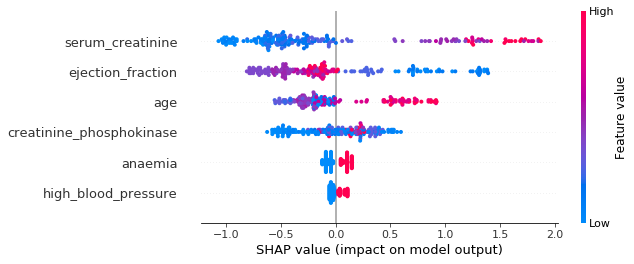

In [133]:
shap.summary_plot(shap_values, features=observations, feature_names=features_used)

That's better than the built-in feature importance on RandomForest because not only we can see what features are important but also how they affect our predictions.

In [134]:
#shap.dependence_plot("nr.employed", shap_values, 
#                     pd.DataFrame(observations, columns=num_features))

# Intepreting models with non tabular data

The tools we have seen above also work with text data and images. There are plenty of examples available online for text-data. Here we will just demonstrate how to use `Lime` to explain an image classifier.

## Interpreting image classifiers

Lime can also be used to explain decisions made for image classification. 

In this example we will use the pretrained `InceptionV3` model available with Keras. Lime is quite slow with images, so it's wiser to stick to a "shallow" deep learning model.

In [ ]:
explainer = LimeImageExplainer()

The explainer is the same as before, we call `explain_instance` to generate a new explanation. We need to provide:
- our observation: here the first row of our numpy matrix (that has only one row since we only have one image)
- our predict function, we can simply use the one from our model here
- `top_labels` the number of classes to explain. Here our model generate probabilities for more than a 1000 classes (and we looked at the five first). We do not want LIME to generate local models to explain each of those classes. As lime is pretty slow with images, let's only ask for the explanation to our two main classes, toucan and school bus
- `num_samples`: the number of new datapoints to create to fit a linear model, let's set it to 1000

*WARNING*: that will be slow. 

In [ ]:
explanation = explainer.explain_instance(image[0], model.predict, 
                                         top_labels=2, num_samples=100,
                                         random_seed=42)

In [ ]:
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt

First let's check the explanation for the predicted class `toucan`. That corresponds to label 96 in the ImageNet classes. We need to use the method `get_image_and_mask` on our explanation object with the following parameters:
- index of the class to explain. We'll start with the index of the main class predicted, that was 96
- positive_only: in order to show the part of the image that contribute positively to this class being selected
- num_features: number of superpixels to use. LIME breaks down our image into a set of superpixels, each containing several pixels. Those superpixels are equivalent to `features` in tabular data.
- hide_rest: to hide the rest of the image

That returns a new image and a mask as numpy arrays. You can then use `mark_boundaries` to show the image together with the mask.

In [ ]:
temp, mask = explanation.get_image_and_mask(96, positive_only=True, num_features=5, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

What feature do you expect to be the most important in that decision? Plot the image with only the main feature (`num_features=1`)

In [ ]:
temp, mask = explanation.get_image_and_mask(96, positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The second class predicted by our model was a bus (label 779), set `positive_only=False` in order to see what features contributed positively and negatively to that decision. What do you see?

In [ ]:
temp, mask = explanation.get_image_and_mask(779, positive_only=False, num_features=8, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Great, now you can try to change the number of features you're looking at and deactivate `positive_only` in order to see features that contribute negatively to the class. You can also look at other classes or try other pictures.

In [135]:
# simulation studies
#what is considered as a large std for normal distribution

import numpy as np
import pandas as pd
def categoricalPoisson(x,c):
    y = np.zeros(x.shape) 
    for i in range(len(x)):
        if x[i]>c:
            
            y[i] = np.random.poisson(x[i],1)
    return y 

def binomialLinear(x,c):
    y = np.zeros(x.shape)
    for i in range(len(x)):
        if x[i]>c:
            y[i] = i/20
        else:
            y[i] = -i/20
    return y 
                
x1 = np.random.normal(3,10,300)
x2 = np.random.normal(5,1,300)
x3 = .7*x1 + .3*x2
x4 = .3*x1 + .7*x2
x5 = np.random.gamma(2,2,300)
x10 = .5*x3*x5
x7 = np.random.poisson(3,300)
x6 = categoricalPoisson(x1,5)
x8 = np.random.binomial(10,.2,300)
x9 = binomialLinear(x8,2)





In [136]:
sim_df = pd.DataFrame(data = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]).T

sim_df_1 = pd.DataFrame(data = [x1,x2,x3,x4]).T

In [137]:
new_names =["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
new_names_1 =["x1","x2","x3","x4"]

sim_df = sim_df.rename(columns={i:j for i,j in zip(sim_df.columns,new_names)})
sim_df_1 = sim_df_1.rename(columns={i:j for i,j in zip(sim_df_1.columns,new_names_1)})


In [138]:
#convert y's to be binary variable
def logisticFunction(x): # input: additive sum of a subject
    return 1/(1+ np.exp(-x))   # output: mapping to probability using logistic function

def simulateResponse(y):  #input: vector of additive sum; output vector of probability
    for i in range(len(y)):
        
        p = logisticFunction(y[i])
        val= np.random.binomial(10,p,1)/10
        if val>.5:
            y[i] = 1
        else:
            y[i] = 0
    return y
 



In [139]:
# constructing responses 
y1 = x1+x2 # include x1,x2,x3,x4
y2 = x6+ x9+x10 # see if it detects x1 and x2 influences
y3 = x7

In [140]:
# fit random forest with y1 and all x 


y1_sim = simulateResponse(y1)

X1_train, X1_test, y1_train, y1_test = train_test_split(sim_df_1, y1, stratify=y1, test_size=.3, random_state=42)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import collections
from sklearn import metrics

In [190]:
random_forest = RandomForestClassifier(n_estimators=100,class_weight="balanced")
random_forest.fit(X1_train, y1_train)
random_forest_preds = random_forest.predict(X1_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y1_test))
print(confusion_matrix(y1_test, random_forest_preds))



The accuracy of the Random Forests model is :	 0.9888888888888889
[[20  0]
 [ 1 69]]


In [192]:
X1_train, X1_test, y1_train, y1_test = train_test_split(sim_df, y1, stratify=y1, test_size=.3, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100,class_weight="balanced")
random_forest.fit(X1_train, y1_train)
random_forest_preds = random_forest.predict(X1_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y1_test))
print(confusion_matrix(y1_test, random_forest_preds))

The accuracy of the Random Forests model is :	 0.9777777777777777
[[20  0]
 [ 2 68]]


In [193]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 
explainer = shap.TreeExplainer(random_forest)